# SOMATIVA 01

## Estudante

In [49]:
# Colocar seu nome aqui
# Desconto de 0,5 pontos se não colocar o nome
# GUSTAVO FURINI

## Instalar bibliotecas

In [50]:
!pip uninstall scikit-learn -y
!pip install -U scikit-learn
!pip install scikit-plot
!pip install scipy==1.11.4

Found existing installation: scikit-learn 1.5.2
Uninstalling scikit-learn-1.5.2:
  Successfully uninstalled scikit-learn-1.5.2
  Using cached scikit_learn-1.5.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.3 MB)


## Importar bibliotecas

In [51]:
import scipy.stats as st
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn import metrics
import scikitplot as skplt

## Conectar com Google Drive

In [52]:
# Conectar com o Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Avaliação dividida em duas partes
* Classificador Bayesiano (2,0 pontos)
* Propriedades da exponencial e Processos de Poisson (2,5 pontos)

## Classificador Bayesiano
Uma empresa utiliza a metodologia de Use Case Points para estimar o esforço necessário para entregar as sprints do desenvolvimento e melhoria do seu produto que tem cinco módulos.<br><br>

A equipe de desempenho decidiu testar se o classificador Bayesiano é adequado para prever se as sprints serão entregues no prazo.<br><br>

Para isso utilizou os dados que foram coletados nos processos de desenvolvimento de software organizando em dois arquivos:
* Dados_Sprints_Treinamento.csv
* Dados_Sprints_Teste.csv<br>

Cada arquivo contém as seguites informações:
* ID_MODULO: identificador do módulo
* Estimativa_UCP: estimativa do esforço em use case points
* Estimativa_Horas: estimativa do esforço em horas para entregar a sprint
* Entrega_no_Prazo: rótulo de classificação
 * 0 - sprint não entregue no prazo
 * 1 - sprint entregue no prazo

#### Ler de dados de treinamento
Se necessário ajustar o path para acesso ao arquivo

In [53]:
# Ler o arquivo com dados
df = pd.read_csv('/content/Dados_Sprints_Treinamento.csv')

df.head(5)

# Salvar nas variáveis X_trein e Y_trein
temp = df.iloc [:, [0,1,2]]
X_trein = temp.to_numpy()
temp = df.iloc[:, 3]
Y_trein = temp.to_numpy()

#### Ler de dados de teste

In [54]:
# Ler aquivo com dados
df = pd.read_csv('/content/Dados_Sprints_Teste.csv')

df.head(5)

# Salvar nas variáveis X_test e Y_test
temp = df.iloc [:, [0,1,2]]
X_test = temp.to_numpy()
temp = df.iloc[:, 3]
Y_test = temp.to_numpy()

### Questão 1 (valor 0,8)
* Criar classificador
* Treinar cutilizando os dados na matriz de treinamento (X_trein) e o vetor com os rótulo no vetor de treinamento (Y_trein)<br>
* Fazer previsão utilizando os dados de teste (X_test)

In [55]:
# Colocar aqui o comando para criar o classificador
classificador = GaussianNB()

# Colocar aqui o ocmando para treinar o classificador
classificador.fit(X_trein, Y_trein)

# Colocar aqui os comandos para fazer as previsões relativas à entrega no prazo
Y_pred = classificador.predict(X_test)

# Imprimir os rótulos do valores no arquivo de teste (Y_test) e as previsões (Y_prev)
print("=========Rótulos dos valores no arquivo de teste=========")
print(Y_test)

print("\n=========Previsões (Y_pred)=========")
print(Y_pred)

precisao = metrics.accuracy_score(Y_test,Y_pred)
print("\n =========Precisão do modelo=========")
print(precisao)


=========Rótulos dos valores no arquivo de teste=========
[0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1
 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1]

=========Previsões (Y_pred)=========
[0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1
 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1]

 =========Precisão do modelo=========
0.9


### Questão 2 (valor 0,6)
* Imprimir o relatório de **métricas de classificação**
* Plotar a **matriz de confuzão**

In [56]:
# Colocar aqui o código imprimir o relatório de métricas de classificação (valor 0,3)
print(metrics.classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.85      0.69      0.76        16
           1       0.91      0.96      0.94        54

    accuracy                           0.90        70
   macro avg       0.88      0.83      0.85        70
weighted avg       0.90      0.90      0.90        70



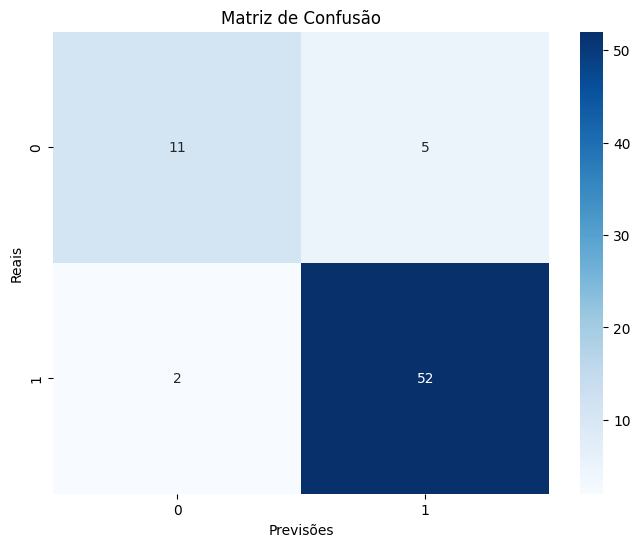

In [57]:
# Colocar aqui o código para plotar a matriz de confusão (valor 0,3)
import matplotlib.pyplot as plt
import seaborn as sns

matriz_confusao = metrics.confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Previsões')
plt.ylabel('Reais')
plt.show()

### Questão 3 (valor 0,6)
* Calcular métrica accuracy sem utilizar bibliotecas (calcular vp vn fp fn e accuracy)
* Imprimir o valor com duas casas decimais

In [58]:
# Colocar seu código aqui
vp = 52
vn = 11
fp = 5
fn = 2

accuracy = (vp + vn) / (vp + vn + fp + fn)
print(f"Acurácia: {accuracy:.2f}")

Acurácia: 0.90


## Propriedades da exponencial e processos de Poisson

### Questão 4 (valor 1,0)
O tempo de atendimento de chamados em um helpdeks é uma variável aleatória exponencial com média igual a 4 minutos. O seu chamado está aguardando na fila com 2 chamados à sua frente (na fila) e mais 1 chamado sendo atendido. Qual a probabilidade de o seu chamado esperar mais do que 6 minutos para começar a ser atendido.

Dicas: Você pode calcular a probabilidade de duas maneiras:<br>
(i) Para o chamado esperar mais do que 6 minutos é preciso que o chamado que está sendo atendido e mais os dois que estão na fila à sua frente demorem mais do que seis minutos. Usar a equação da função gama para calcular $P[S_{N} > x]$.<br>
(ii) Para o chamado esperar mais do que 6 minutos é preciso que no intervalo de 6 minutos ocorra uma das seguintes possibilidades: nenhum chamado terminou de ser atendido no intervalo, ou 1 terminou, ou 2 terminaram. O terceiro deve terminar depois de 6 minutos. Usar a equação do processo de poisson para calcular $P[N_{s} = 0] + P[N_{s} = 1] + P[N_{s} = 2]$.

Escolher uma delas para responder.

In [59]:
# P[SN>x]

import scipy.stats as stats

media = 4
lambda_ = 1 / media

# Número de chamados
n_chamados = 3

# Tempo de espera
tempo_espera = 6

k = n_chamados
theta = 1 / lambda_

# Probabilidade de espera mais que 6 minutos
probabilidade = 1 - stats.gamma.cdf(tempo_espera, a=k, scale=theta)

print(f'A probabilidade do chamado esperar mais do que 6 minutos para começar a ser atendido é {probabilidade:.4f}')


A probabilidade do chamado esperar mais do que 6 minutos para começar a ser atendido é 0.8088


### Questão 5 (valor 1,5)
Um helpdesk trata apenas 3 categorias de solicitações: (i) problemas de login; (ii) problemas de hardware; (iii) problemas configuração. As solicitações chegam segundo processos de Poisson com as seguintes taxas: $L_{L}$ = 0.5 solicitações de problemas de login por dia; $L_{H}$ = 2.5 solicitações de problemas de hardware por dia; e $L_{C}$ = 1.5 solicitações de problemas de configuração por dia. Qual a probabilidade que em 2 dias cheguem 3 solicitações, todas de hardware?
Dica: para que cheguem 3 solicitações, todas de hardware, é necessário que cheguem 0 solicitações de login, 0 solicitações de configuração, e 3 solicitações de hardware.

In [60]:
# Calcular e imprimir a probabilidade de zero solicitações de login em 2 dias
# Taxa de chegada de solicitações de login por dia
lambda_L = 0.5

# Em 2 dias
lambda_L_2_days = 2 * lambda_L

# Probabilidade de zero solicitações de login em 2 dias
prob_zero_login = st.poisson.pmf(0, lambda_L_2_days)

print(f"========= A probabilidade de zero solicitações de login em 2 dias é ========= \n{prob_zero_login:.4f}")

# Calcular e imprimir a probabilidade de zero solicitações de configuração em 2 dias
# Taxa de chegada de solicitações de configuração por dia
lambda_C = 1.5

# Em 2 dias
lambda_C_2_days = 2 * lambda_C

# Probabilidade de zero solicitações de configuração em 2 dias
prob_zero_config = st.poisson.pmf(0, lambda_C_2_days)

print(f"========= A probabilidade de zero solicitações de configuração em 2 dias é ========= \n{prob_zero_config:.4f}")

# Calcular e imprimir a probabilidade de três solicitações de hardware em 2 dias
# Taxa de chegada de solicitações de hardwate por dia
lambda_H = 2.5

# Em 2 dias
lambda_H_3_days = 2 * lambda_H

# Probabilidade de zero solicitações de configuração em 2 dias
prob_tres_config = st.poisson.pmf(3, lambda_H_3_days)

print(f"========= A probabilidade de três solicitações de hardware em 2 dias é ========= \n{prob_tres_config:.4f}")


# Calcular e imprimir a probabilidade de três solicitações, todas de hardware, em 2 dias
prob_tres_hardware_somente = prob_zero_login * prob_zero_config * prob_tres_config
print(f"========= A probabilidade de apenas três solicitações de hardware em 2 dias é ========= \n{prob_tres_hardware_somente:.4f}")


========= A probabilidade de zero solicitações de login em 2 dias é ========= 
0.3679
========= A probabilidade de zero solicitações de configuração em 2 dias é ========= 
0.0498
========= A probabilidade de três solicitações de hardware em 2 dias é ========= 
0.1404
========= A probabilidade de apenas três solicitações de hardware em 2 dias é ========= 
0.0026


# Entrega
* resolver as questões
* salvar o notebook como pdf
* verificar se todas as respostas estão legíveis, incluindo gráficos
* renomear o arquivo para: seu-nome-SOMATIVA01
* entregar no AVA (entrega individual)